In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
from sklearn.datasets import load_boston

In [10]:
boston_ds = load_boston()

In [11]:
print(boston_ds.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [12]:
boston_df = pd.DataFrame(boston_ds.data,columns = boston_ds.feature_names)

In [13]:
#Print first 5 rows of df
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
#Adding missing target value MEDV to the dataframe 
boston_df['MEDV'] = boston_ds.target

In [23]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Data Preprocessing

In [15]:
#Checking for null values and counting them if any
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

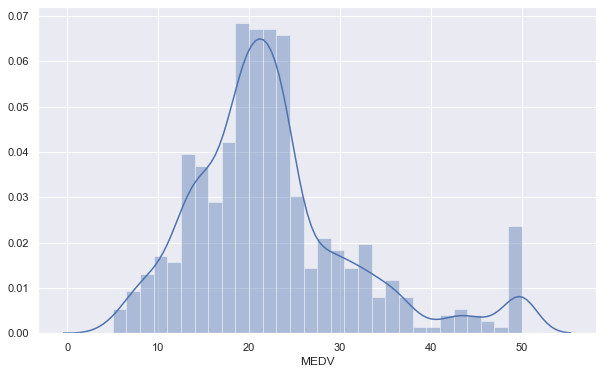

In [16]:
sns.set_style('whitegrid')
sns.set(rc = {'figure.figsize': (10,6)})
sns.distplot(boston_df['MEDV'], bins = 30)
plt.show()

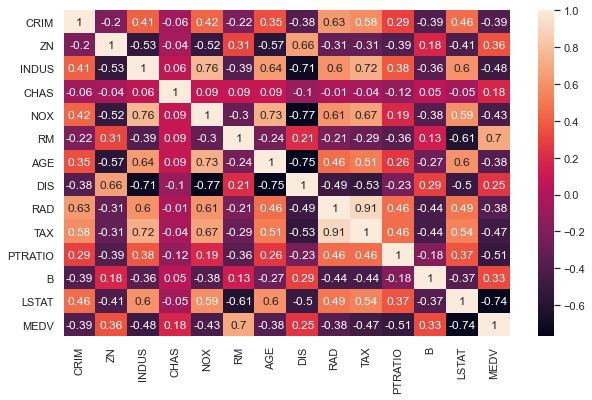

In [19]:
#Create correlation matrix 
correlation_matrix = boston_df.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)

From the above observations we can see that RM has a strong positive correlation of 0.7 and LSTAT has a strong negative correlation of -0.74

Therfore we choose RM and LSTAT as features



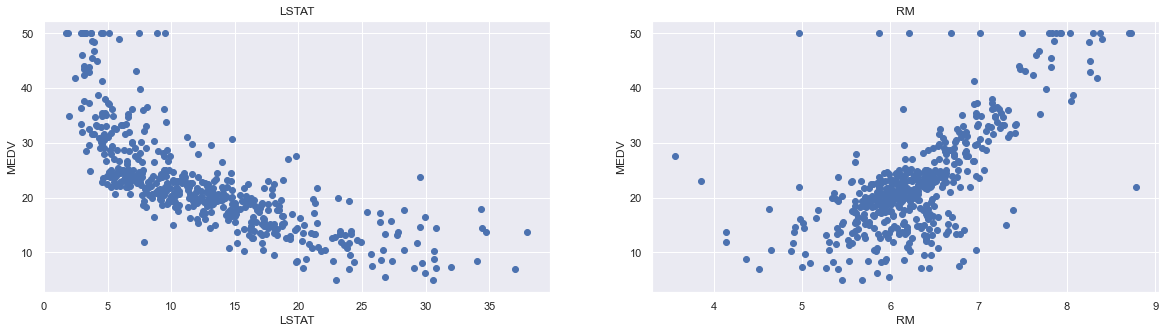

In [25]:
#Using a scatterplot we see how features vary with MEDV
plt.figure(figsize=(20,5))
features = ['LSTAT', 'RM']
target = boston_df['MEDV']
for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = boston_df[col]
    y = target
    plt.scatter(x,y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

## Observations:

The prices increase as the value of RM increases linearly. 
The prices decrease with an increase in LSTAT.

## Preparing the data for the training model:

In [28]:
##Concatenate LSTAT and RM columns using np.c_
X = pd.DataFrame(np.c_[boston_df['LSTAT'], boston_df['RM']], columns = ['LSTAT', 'RM'])
Y = boston_df['MEDV']

### Split data into Training and Testing Data

In [31]:
from sklearn.model_selection import train_test_split
#train the model with 80% of the samples and test with the remaining 20%
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


### Training and Testing the model

We use scikit-learn’s LinearRegression to train our model on both the training and test sets.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
linear_model.fit(X_train,Y_train)

LinearRegression()

### Model Evaluation

In [36]:
# evaluate our model using RMSE and R2-score.
from sklearn.metrics import r2_score
y_train_predict = linear_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train,y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = linear_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.13740078470291
R2 score is 0.6628996975186954
